<a href="https://colab.research.google.com/github/anaguilarar/seed_counting/blob/main/seed_imaging_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cloning the seed counting repository

This repository uses the models that were obtained by  [Toda et. al. (2019)](https://doi.org/10.1038/s42003-020-0905-5), which is based on [Mask_RCNN](https://arxiv.org/abs/1703.06870).
We updated the Mask_RCNN files aimed at facilitating its use with TF > 2

In [28]:
import os
if not os.path.exists("/content/seed_counting"):
    !git clone https://github.com/anaguilarar/seed_counting.git
    print("Cloned")
else:
    print("seed_counting directory already exists")

if not os.path.basename(os.getcwd()) == "/content/seed_counting":
    os.chdir("/content/seed_counting")

seed_counting directory already exists


### Rice (Nipponbare) seed detection

Using an object detection and image detection model, we detect individual seeds in an image. For each seed, we estimate its width, height, and area. The unity is pixel

In [5]:
### importing libraries
from seedimaging.general import RiceSeeds
import keras.backend as K
import matplotlib.pyplot as plt
from skimage.io import imread

/content/seed_counting/Mask_RCNN/mrcnn/model.py:2362: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if os.name is 'nt':


In [7]:
### start model configuration
K.clear_session()
## Currently the model is available on a Amazon server
wp = "https://dlmodels-bucket.s3.ap-northeast-1.amazonaws.com/rice.zip"
ricemodel=RiceSeeds(weigths= wp)


Instructions for updating:
Use fn_output_signature instead


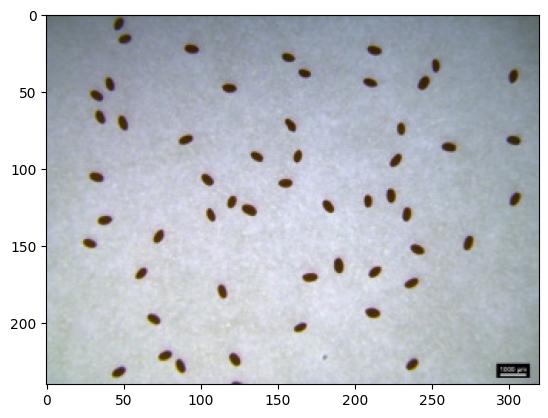

In [23]:
### read a single as example
imagepath = "/content/tg1-1.jpeg"
image = imread(imagepath)
plt.imshow(image)

In [24]:
## run the model
riceresults = ricemodel.seeds_detect(image, )

Processing 1 images
image                    shape: (240, 320, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 704, 3)      min: -123.70000  max:  148.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  704.00000  float64
anchors                  shape: (1, 90024, 4)         min:   -0.70849  max:    1.58325  float32


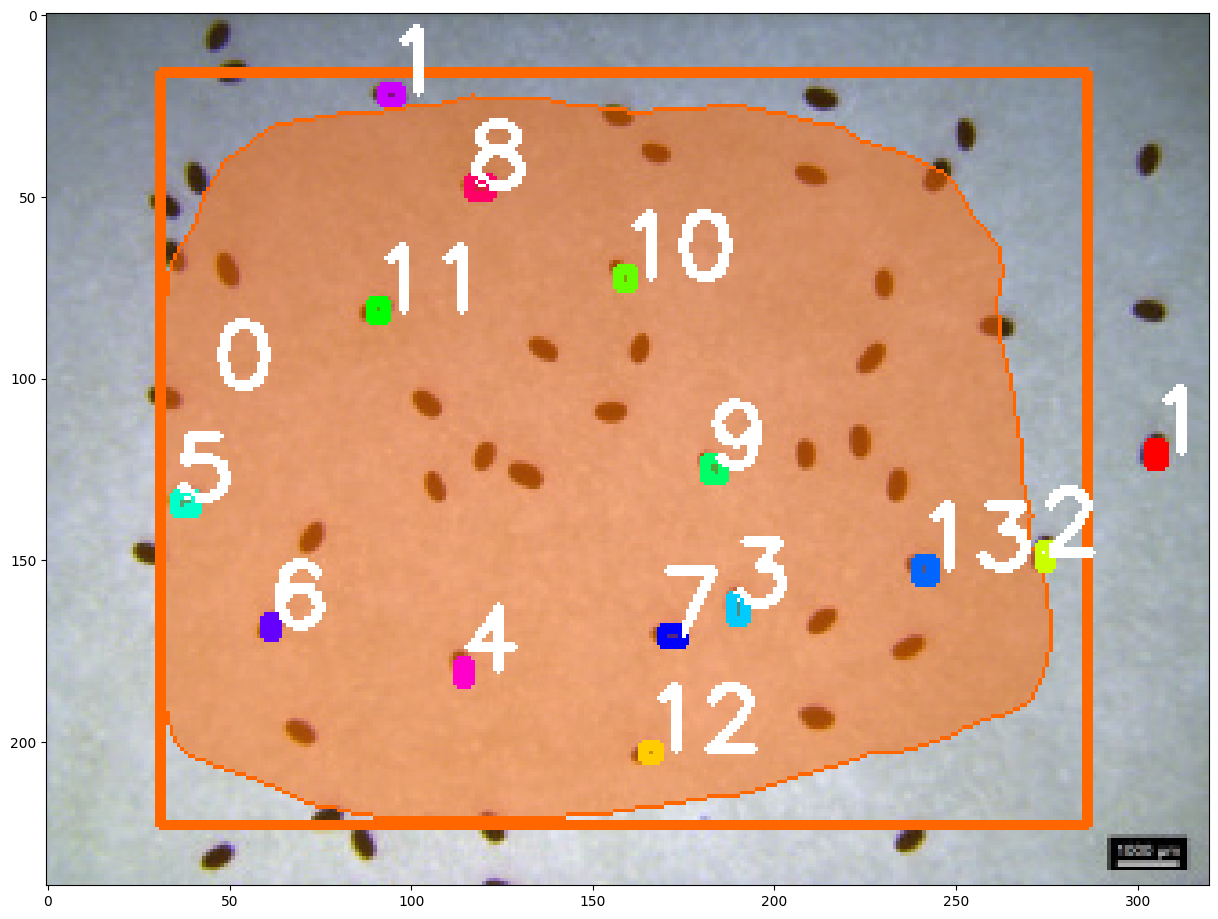

In [26]:
## the final detections is going to be shown but it will a couple of minutes if there are more than 100 objects
ricemodel.plot_all_detections(figsize = (15,15))


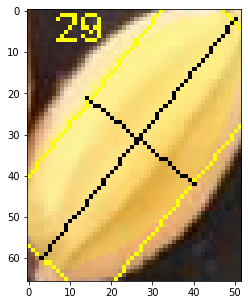

In [ ]:
### show a single detection given the seed number
seednumber = 29
ricemodel.plot_individual_seed(seednumber, figsize = (5,5), 
                              addlabel = True, ## the seed number will be added if the value is trye
                              fontscale = 0.3)

In [ ]:
## export seeds metrics 
imagename = os.path.basename(imagepath)
imagename = imagename[:imagename.index('.')]

df = ricemodel.seeds_summary()
df.to_csv('summary_{}.csv'.format(imagename))

df


,id,height,width,area
0,0,73.539105,29.732137,1804.0
0,1,78.600254,34.409301,2166.0
0,2,74.953319,32.526912,1944.0
0,3,80.610173,33.941125,2238.0
0,4,72.801099,35.114100,1997.0
...,...,...,...,...
0,102,83.000000,38.000000,2648.0
0,103,76.000000,33.000000,1999.0
0,104,39.204592,37.802116,2377.0
0,105,81.000000,35.000000,2255.0
